In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import load_processed_data as ld
from definitions import REPO_ROOT_PATH, PROCESSED_DATA_PATH
from keras.preprocessing.image import img_to_array, load_img, array_to_img
import cv2

In [187]:
# configure matplotlib settings
rcParams.update({'font.size' : 16})

In [2]:
# load train, validation, test dataframes with the processed data
_, _, df_train = ld.load_train_data()
_, _, df_val = ld.load_validation_data()
_, _, df_test = ld.load_test_data()

# concatenate the dataframes into one with all processed data
df = pd.concat([df_train, df_val, df_test], ignore_index=True)

In [3]:
df_class_list = df.image_class.unique().tolist()

# initialize dicts of pixel arrays 
X_rgb = {}
X_avg_rgb = {}
X_avg_bw = {}

# fill dicts with pixel arrays keyed by class
for c in df_class_list:
    X_rgb[c] = np.array(df.pixel_array_custom_image_size[df.image_class == c].tolist())
    X_avg_rgb[c] = np.mean(X_rgb[c], axis=0)
    X_avg_bw[c] = cv2.cvtColor(X_avg_rgb[c], cv2.COLOR_RGB2GRAY)

Text(0.04, 0.5, 'Frequency Count')

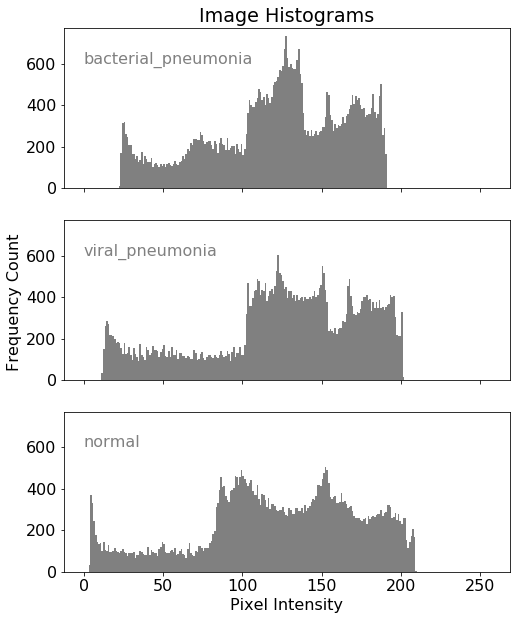

In [198]:
#line_colors = ['c','m']

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8,10))

for ic, c in enumerate(df_class_list):
    ax[ic].hist(X_avg_bw[c].ravel(), bins=256, range=[0, 256], color='grey')
    ax[ic].text(0, 600, c, color='grey')
ax[0].set_title('Image Histograms')
ax[-1].set_xlabel('Pixel Intensity')
fig.text(0.04, 0.5, 'Frequency Count', ha='center', va='center', rotation='vertical')

In [156]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001884CC07588>,
      dtype=object)